# Phase 4: In-Depth Exploratory Data Analysis (EDA)

## Objectives:
- Univariate Analysis: Distribution of individual features
- Bivariate Analysis: Relationships between pairs of features
- Multivariate Analysis: Complex relationships and patterns
- Customer Segmentation Analysis: RFM segments deep dive
- Business Insights: Actionable findings for strategy

## Dataset:
- Source: `data/processed/featured_customer_data.csv`
- Features: 28 (11 original + 17 engineered)
- Records: 350 customers

## 1. Setup and Data Loading

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [3]:
# Load the featured dataset
df = pd.read_csv('../data/processed/featured_customer_data.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nColumns ({len(df.columns)}):")
print(df.columns.tolist())
print(f"\nFirst 3 rows:")
df.head(3)

Dataset Shape: (350, 28)

Columns (28):
['customer_id', 'gender', 'age', 'city', 'membership_type', 'total_spend', 'items_purchased', 'average_rating', 'discount_applied', 'days_since_last_purchase', 'satisfaction_level', 'clv', 'aov', 'purchase_frequency', 'recency_score', 'frequency_score', 'monetary_score', 'rfm_score', 'rfm_value', 'rfm_segment', 'age_group', 'spending_category', 'norm_frequency', 'norm_rating', 'norm_recency', 'engagement_score', 'discount_user', 'churn_risk']

First 3 rows:


,customer_id,gender,age,city,membership_type,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level,clv,aov,purchase_frequency,recency_score,frequency_score,monetary_score,rfm_score,rfm_value,rfm_segment,age_group,spending_category,norm_frequency,norm_rating,norm_recency,engagement_score,discount_user,churn_risk
0,101,Female,29,New York,Gold,1120.20,14,4.60,True,25,Satisfied,1120.20,80.01,14,3,4,4,344,11,Loyal,Young (< 30),High Spender,0.50,0.84,0.70,66.37,1,Low Risk
1,102,Male,34,Los Angeles,Silver,780.50,11,4.10,False,18,Neutral,780.50,70.95,11,4,2,3,423,9,Potential Loyalist,Early 30s (30-34),High Spender,0.29,0.58,0.83,53.80,0,Low Risk
2,103,Female,43,Chicago,Bronze,510.75,9,3.40,True,42,Unsatisfied,510.75,56.75,9,1,1,2,112,4,Hibernating,Mature (40+),Medium Spender,0.14,0.21,0.39,23.70,1,High Risk


## 2. Univariate Analysis
### 2.1 Numerical Features Distribution

In [4]:
# Define numerical columns
numerical_cols = ['age', 'total_spend', 'items_purchased', 'average_rating', 
                  'days_since_last_purchase', 'clv', 'aov', 'purchase_frequency',
                  'recency_score', 'frequency_score', 'monetary_score', 'rfm_value',
                  'engagement_score']

# Statistical summary
print("📊 Statistical Summary of Key Numerical Features:\n")
df[numerical_cols].describe().T

📊 Statistical Summary of Key Numerical Features:



,count,mean,std,min,25%,50%,75%,max
age,350.00,33.60,4.87,26.00,30.00,32.50,37.00,43.00
total_spend,350.00,845.38,362.06,410.80,502.00,775.20,1160.60,1520.10
items_purchased,350.00,12.60,4.16,7.00,9.00,12.00,15.00,21.00
average_rating,350.00,4.02,0.58,3.00,3.50,4.10,4.50,4.90
days_since_last_purchase,350.00,26.59,13.44,9.00,15.00,23.00,38.00,63.00
clv,350.00,845.38,362.06,410.80,502.00,775.20,1160.60,1520.10
aov,350.00,65.23,9.00,49.52,57.37,67.03,73.03,83.59
purchase_frequency,350.00,12.60,4.16,7.00,9.00,12.00,15.00,21.00
recency_score,350.00,3.09,1.43,1.00,2.00,3.00,4.00,5.00
frequency_score,350.00,2.77,1.44,1.00,1.00,3.00,4.00,5.00


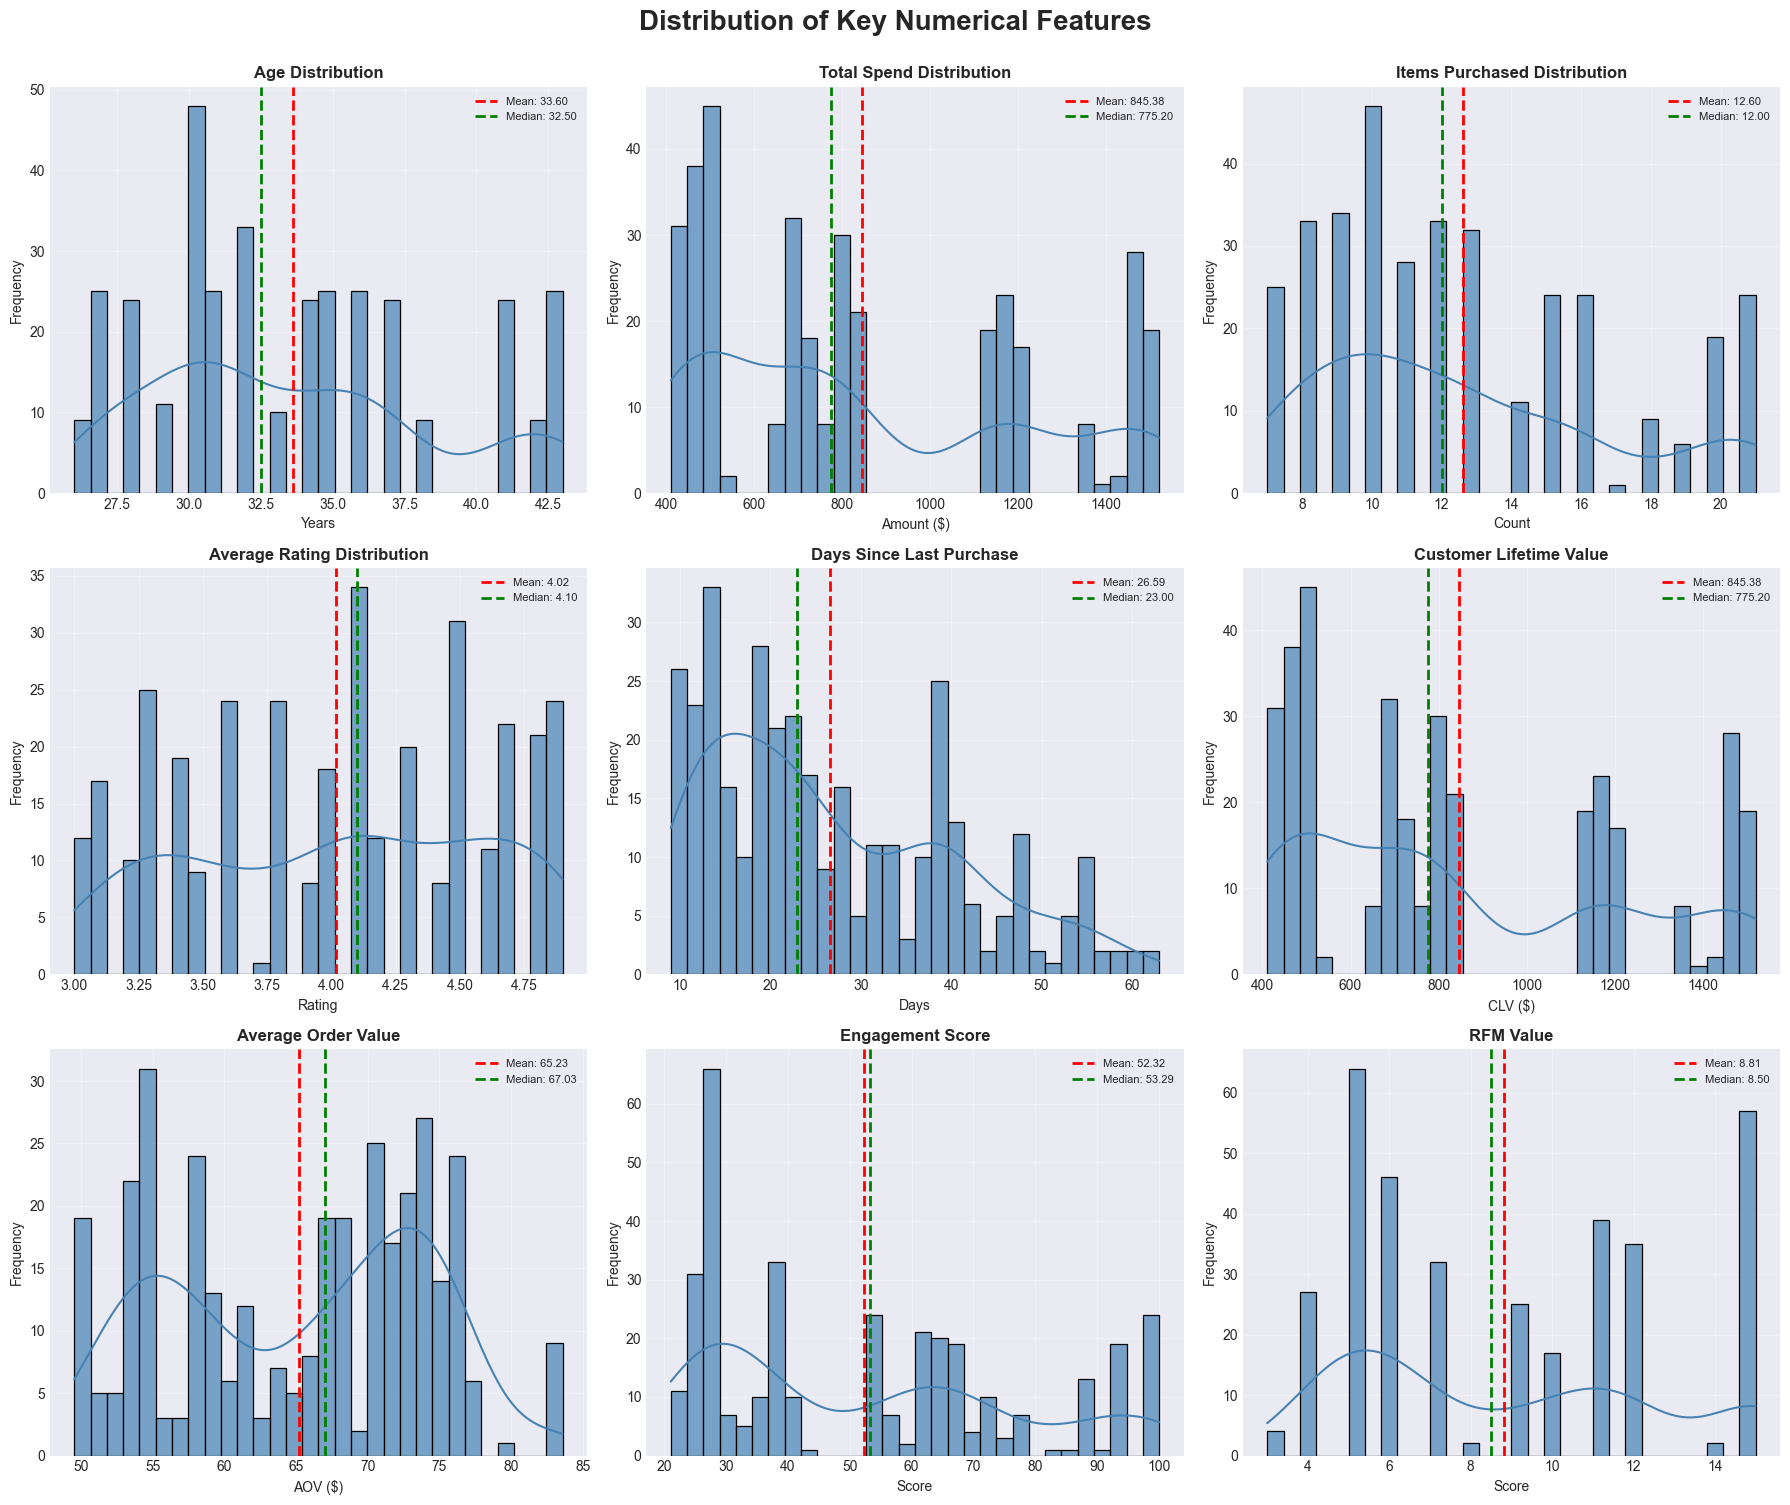

✅ Distribution plots saved to visualizations/univariate_distributions.png


In [5]:
# Distribution plots for key metrics
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Distribution of Key Numerical Features', fontsize=20, fontweight='bold', y=1.00)

# Define key features to visualize
key_features = [
    ('age', 'Age Distribution', 'Years'),
    ('total_spend', 'Total Spend Distribution', 'Amount ($)'),
    ('items_purchased', 'Items Purchased Distribution', 'Count'),
    ('average_rating', 'Average Rating Distribution', 'Rating'),
    ('days_since_last_purchase', 'Days Since Last Purchase', 'Days'),
    ('clv', 'Customer Lifetime Value', 'CLV ($)'),
    ('aov', 'Average Order Value', 'AOV ($)'),
    ('engagement_score', 'Engagement Score', 'Score'),
    ('rfm_value', 'RFM Value', 'Score')
]

for idx, (col, title, xlabel) in enumerate(key_features):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    # Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=ax, bins=30, color='steelblue', alpha=0.7)
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../visualizations/univariate_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Distribution plots saved to visualizations/univariate_distributions.png")

### 2.2 Categorical Features Analysis

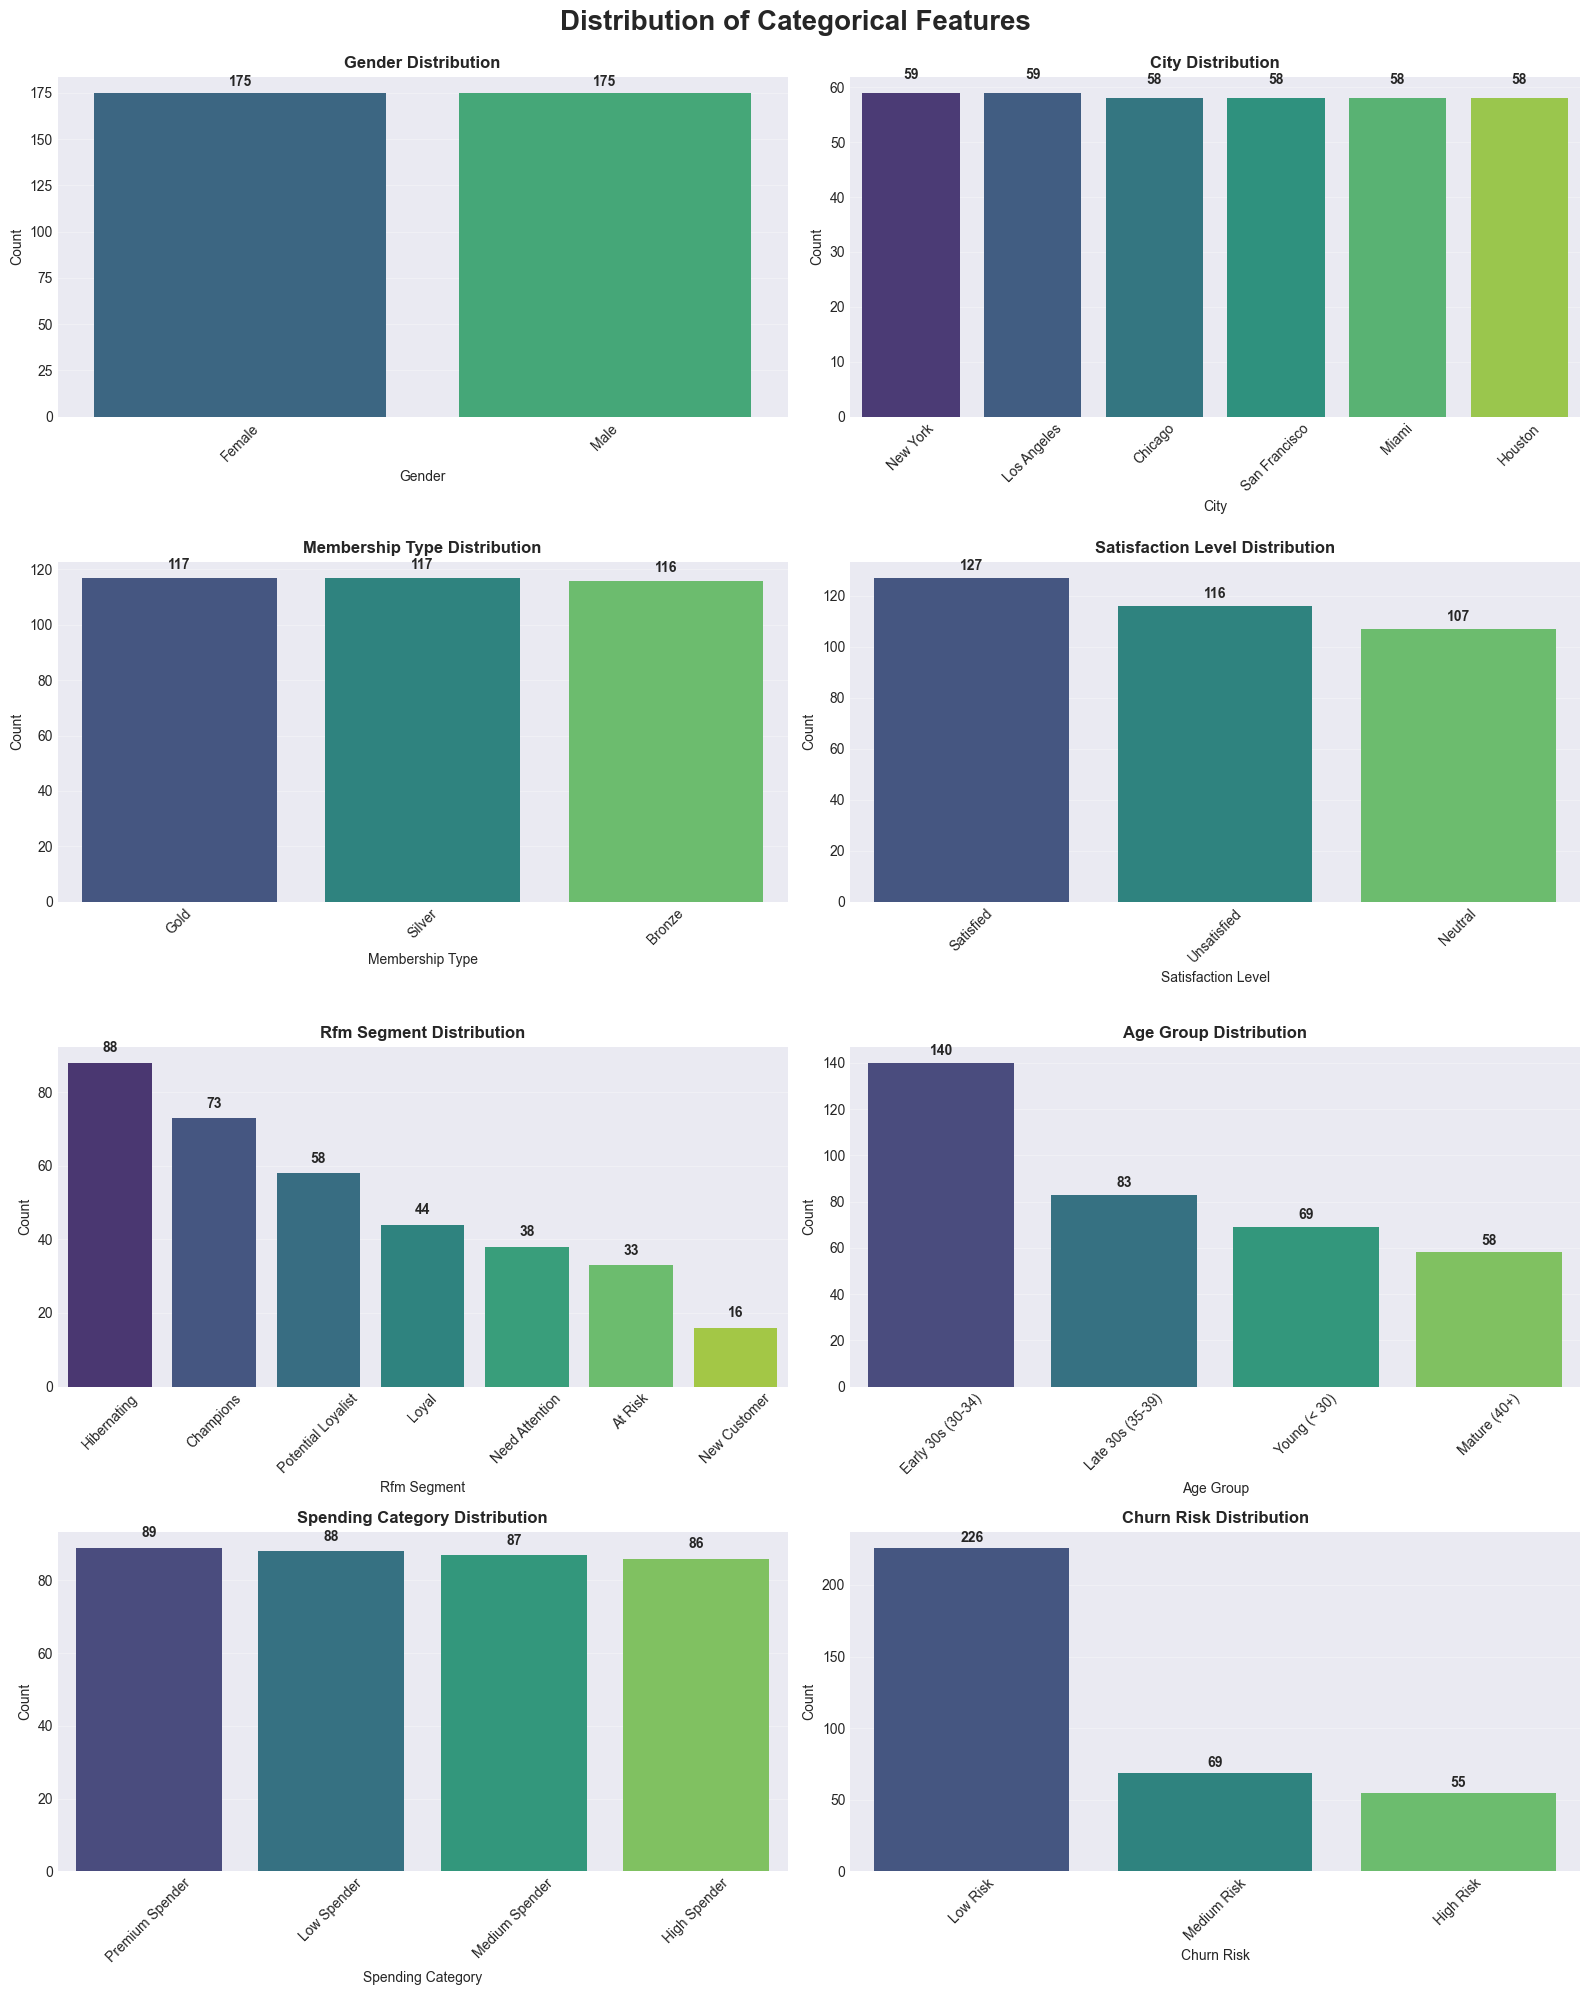

✅ Categorical distribution plots saved to visualizations/categorical_distributions.png


In [6]:
# Categorical columns
categorical_cols = ['gender', 'city', 'membership_type', 'satisfaction_level',
                   'rfm_segment', 'age_group', 'spending_category', 'churn_risk']

# Count plots for categorical features
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Distribution of Categorical Features', fontsize=20, fontweight='bold', y=0.995)

for idx, col in enumerate(categorical_cols):
    row = idx // 2
    col_idx = idx % 2
    ax = axes[row, col_idx]
    
    # Value counts
    value_counts = df[col].value_counts()
    
    # Bar plot
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette='viridis')
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        ax.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax.set_title(f'{col.replace("_", " ").title()} Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel(col.replace('_', ' ').title(), fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../visualizations/categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Categorical distribution plots saved to visualizations/categorical_distributions.png")

## 3. Bivariate Analysis
### 3.1 Correlation Analysis

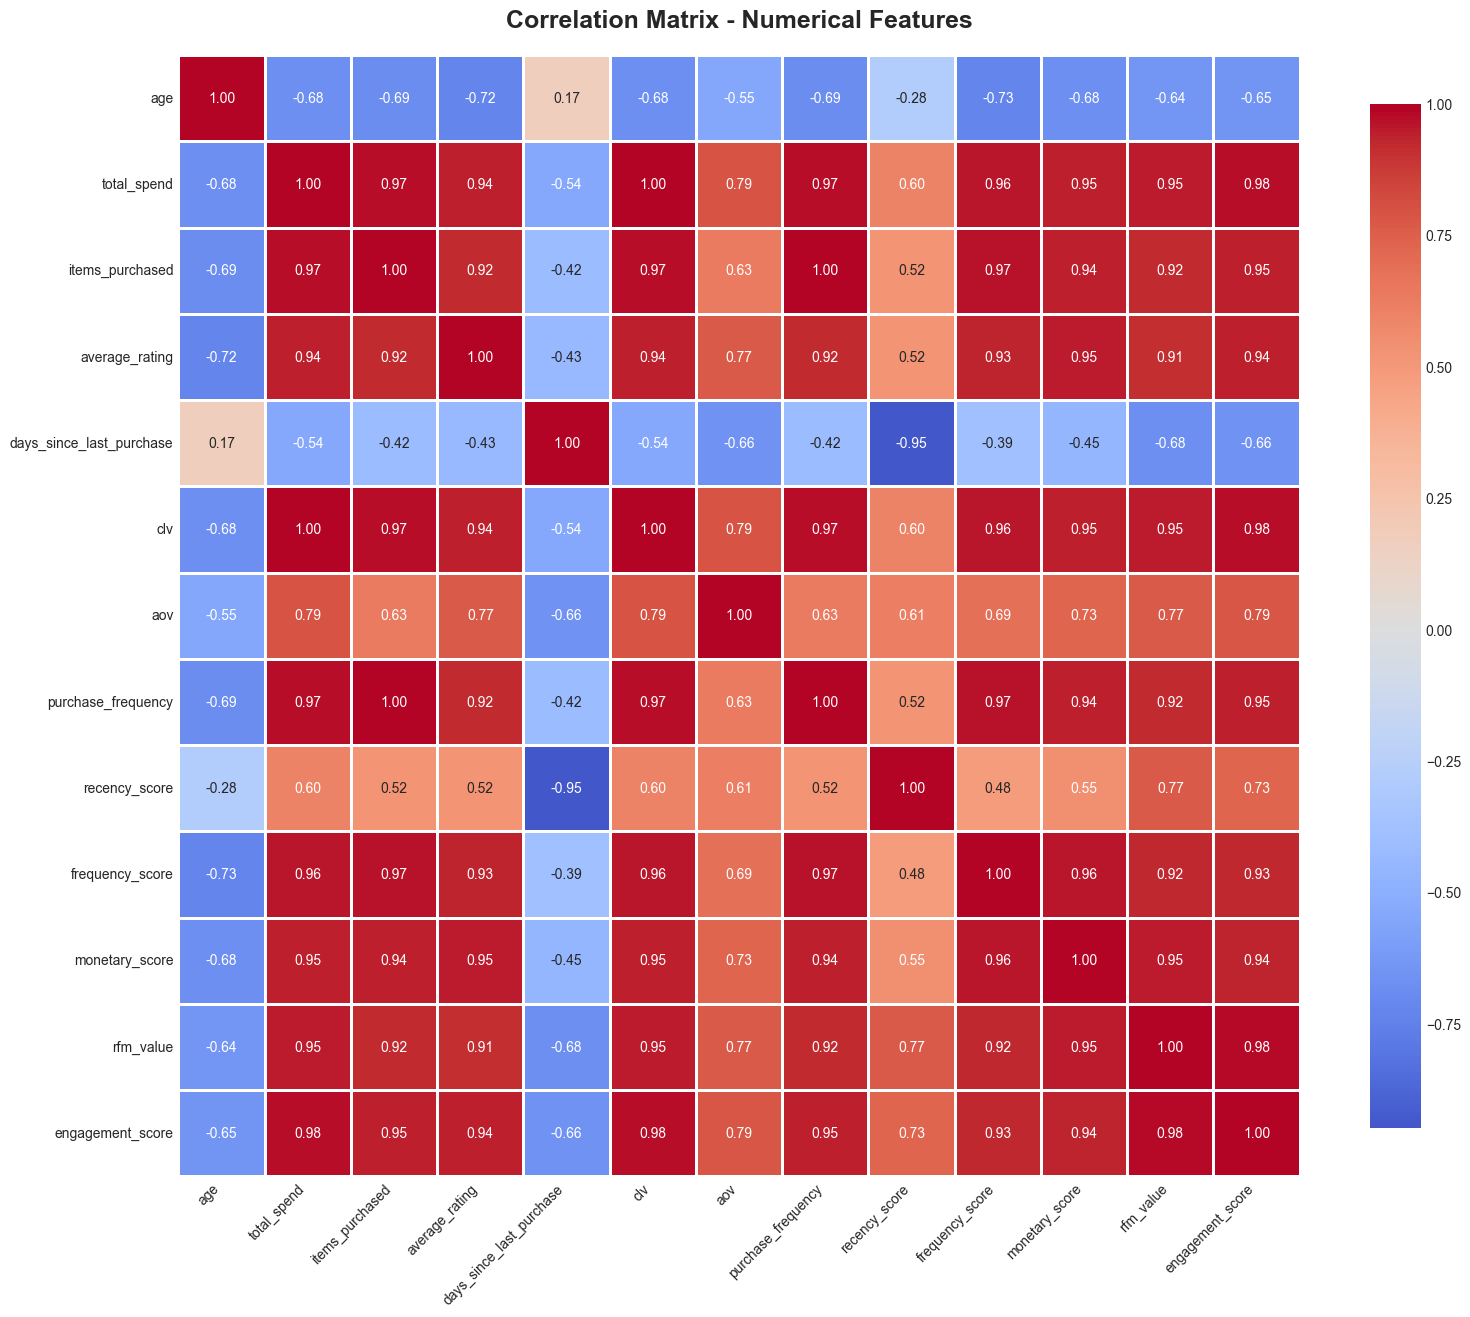

✅ Correlation heatmap saved to visualizations/correlation_heatmap_detailed.png


In [7]:
# Correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()

# Large correlation heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('../visualizations/correlation_heatmap_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Correlation heatmap saved to visualizations/correlation_heatmap_detailed.png")

In [8]:
# Find strongest correlations
print("🔍 Strongest Positive Correlations (> 0.7):\n")
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > 0.7:
            corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

corr_df = pd.DataFrame(corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
corr_df = corr_df.sort_values('Correlation', ascending=False)
print(corr_df.to_string(index=False))

print("\n🔍 Strongest Negative Correlations (< -0.4):\n")
neg_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] < -0.4:
            neg_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

neg_corr_df = pd.DataFrame(neg_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
neg_corr_df = neg_corr_df.sort_values('Correlation', ascending=True)
print(neg_corr_df.to_string(index=False))

🔍 Strongest Positive Correlations (> 0.7):

         Feature 1          Feature 2  Correlation
       total_spend                clv         1.00
   items_purchased purchase_frequency         1.00
         rfm_value   engagement_score         0.98
       total_spend   engagement_score         0.98
               clv   engagement_score         0.98
               clv purchase_frequency         0.97
   items_purchased                clv         0.97
       total_spend    items_purchased         0.97
       total_spend purchase_frequency         0.97
   items_purchased    frequency_score         0.97
purchase_frequency    frequency_score         0.97
       total_spend    frequency_score         0.96
               clv    frequency_score         0.96
   frequency_score     monetary_score         0.96
    average_rating     monetary_score         0.95
       total_spend          rfm_value         0.95
               clv          rfm_value         0.95
    monetary_score          rfm_value 

### 3.2 Key Relationships Scatter Plots

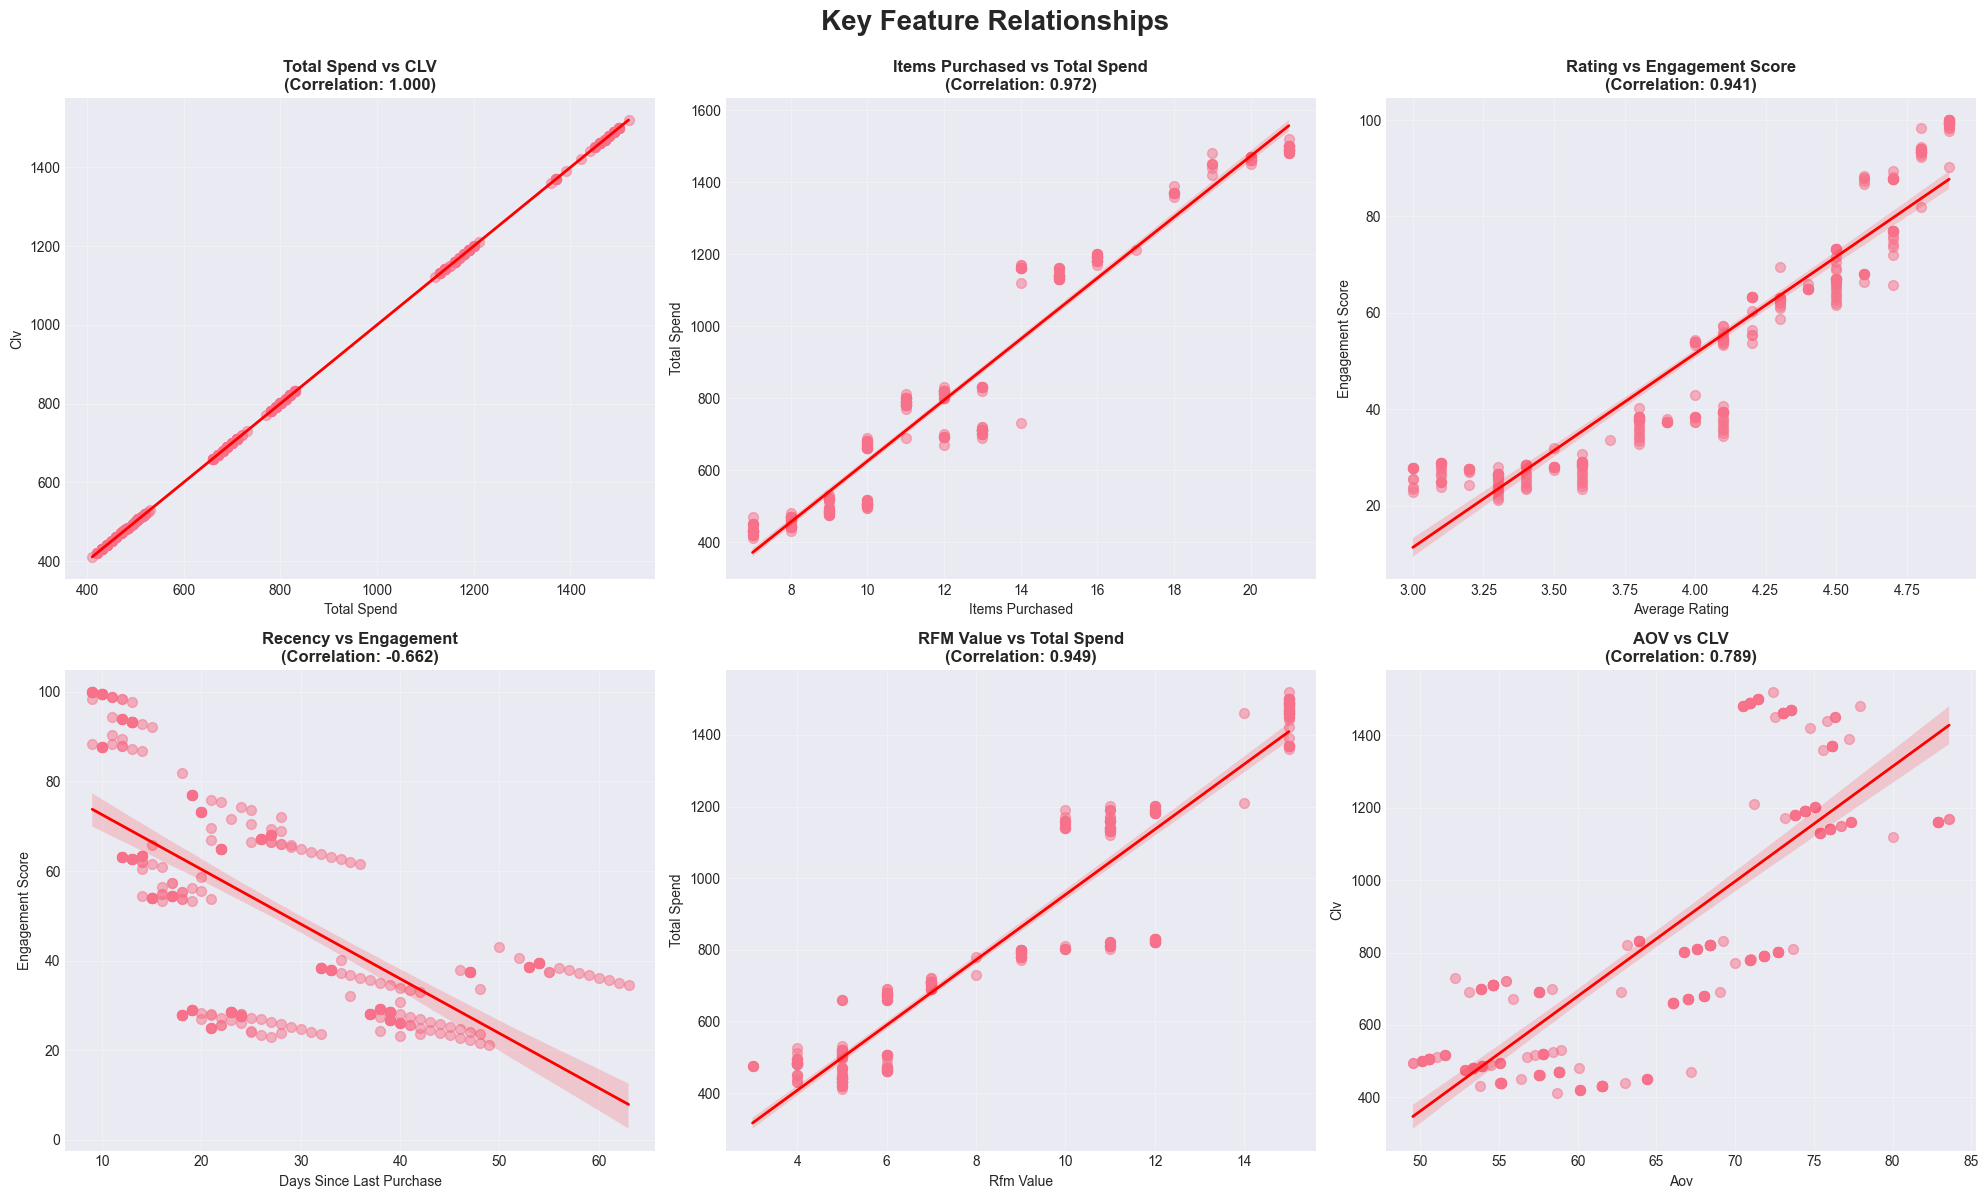

✅ Relationship plots saved to visualizations/bivariate_relationships.png


In [9]:
# Scatter plots for key relationships
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Key Feature Relationships', fontsize=20, fontweight='bold', y=0.995)

relationships = [
    ('total_spend', 'clv', 'Total Spend vs CLV'),
    ('items_purchased', 'total_spend', 'Items Purchased vs Total Spend'),
    ('average_rating', 'engagement_score', 'Rating vs Engagement Score'),
    ('days_since_last_purchase', 'engagement_score', 'Recency vs Engagement'),
    ('rfm_value', 'total_spend', 'RFM Value vs Total Spend'),
    ('aov', 'clv', 'AOV vs CLV')
]

for idx, (x_col, y_col, title) in enumerate(relationships):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    # Scatter plot with regression line
    sns.regplot(data=df, x=x_col, y=y_col, ax=ax, 
                scatter_kws={'alpha': 0.5, 's': 50}, 
                line_kws={'color': 'red', 'linewidth': 2})
    
    # Calculate correlation
    corr = df[[x_col, y_col]].corr().iloc[0, 1]
    
    ax.set_title(f'{title}\n(Correlation: {corr:.3f})', fontsize=12, fontweight='bold')
    ax.set_xlabel(x_col.replace('_', ' ').title(), fontsize=10)
    ax.set_ylabel(y_col.replace('_', ' ').title(), fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../visualizations/bivariate_relationships.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Relationship plots saved to visualizations/bivariate_relationships.png")

### 3.3 Categorical vs Numerical Analysis

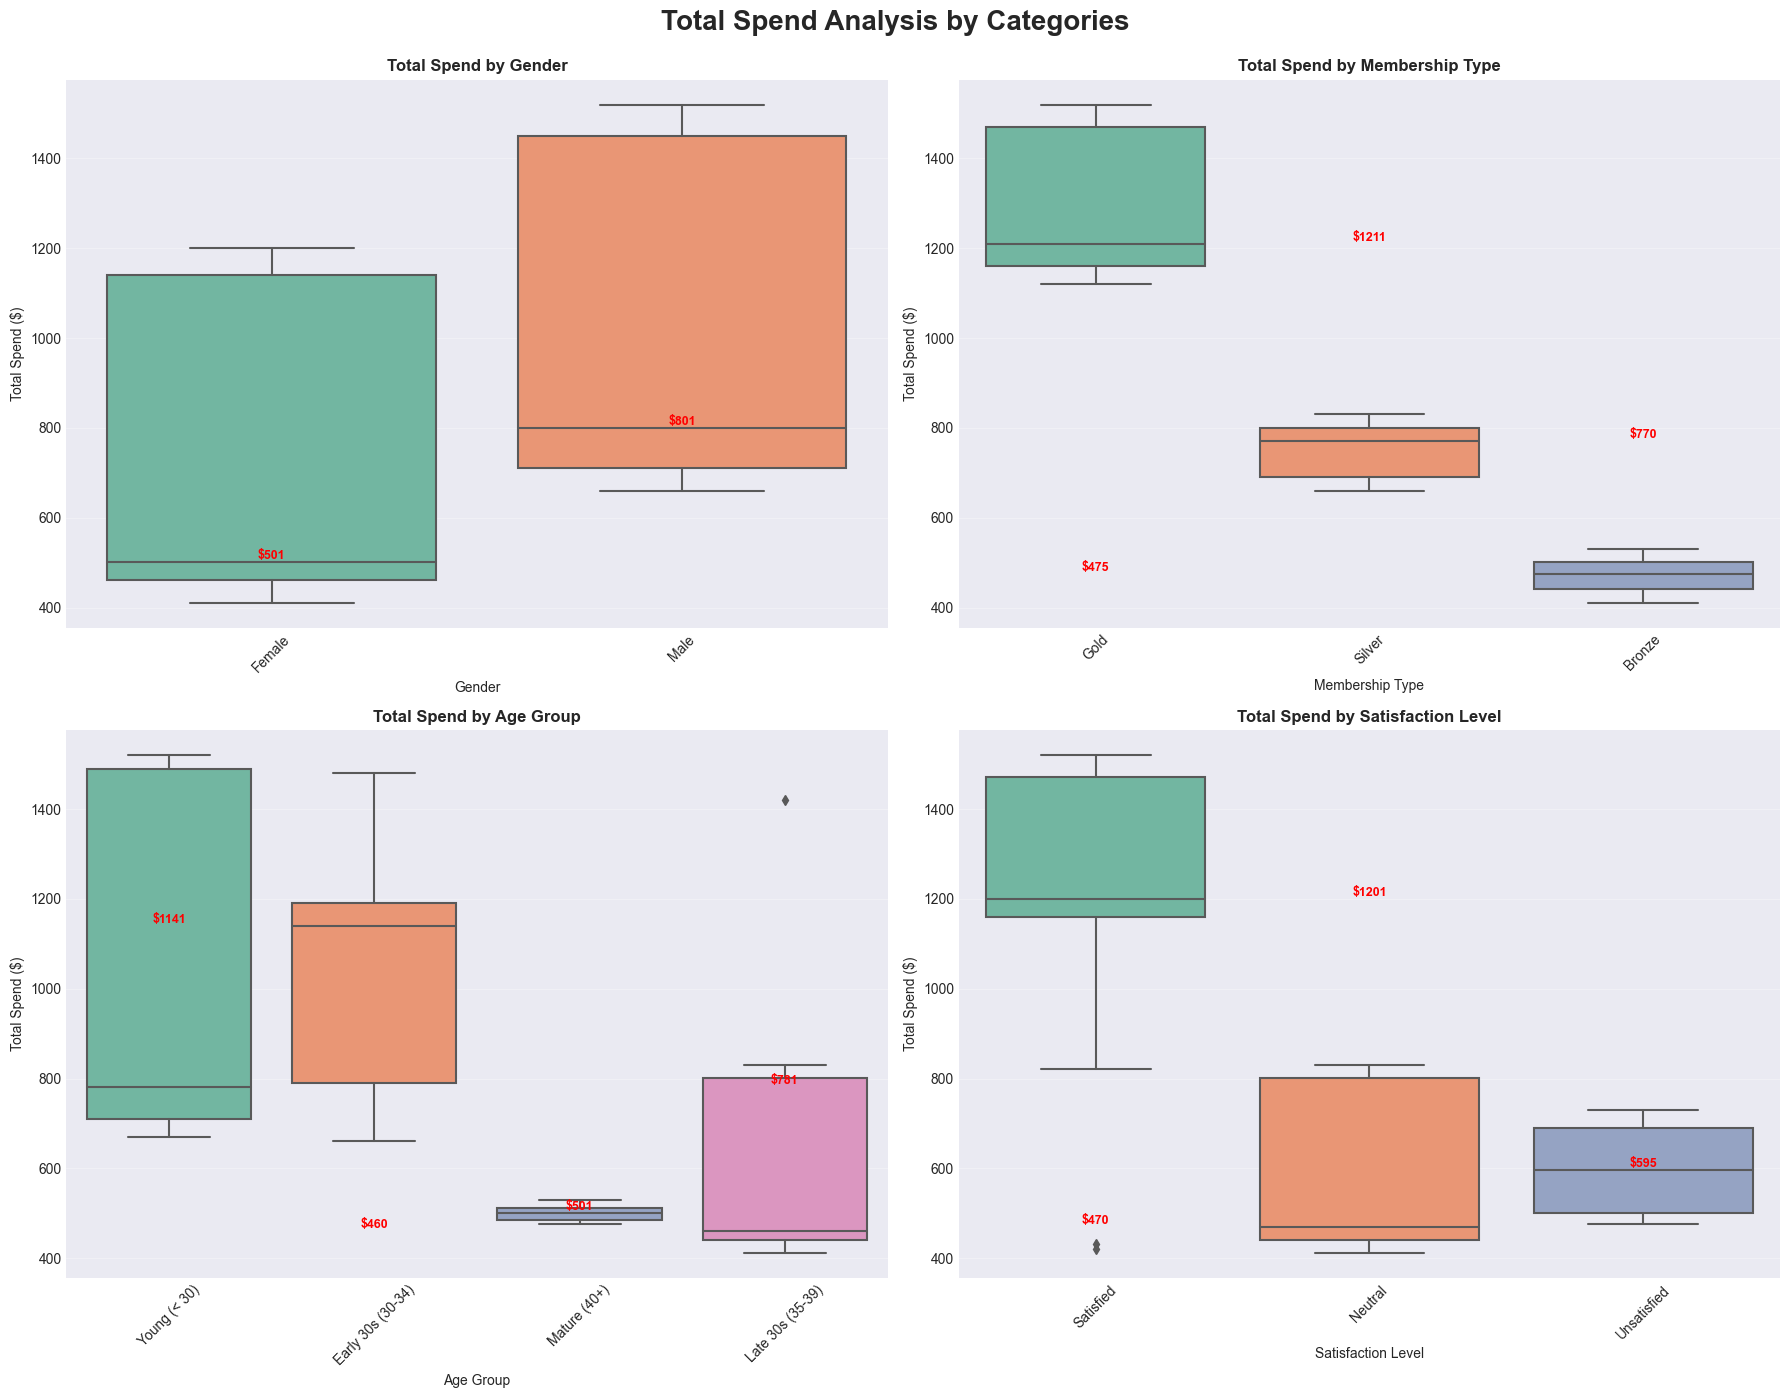

✅ Category analysis plots saved to visualizations/spending_by_categories.png


In [10]:
# Box plots: Spending by categorical features
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Total Spend Analysis by Categories', fontsize=20, fontweight='bold', y=0.995)

cat_features = ['gender', 'membership_type', 'age_group', 'satisfaction_level']

for idx, cat_col in enumerate(cat_features):
    row = idx // 2
    col_idx = idx % 2
    ax = axes[row, col_idx]
    
    # Box plot
    sns.boxplot(data=df, x=cat_col, y='total_spend', ax=ax, palette='Set2')
    
    # Add median values
    medians = df.groupby(cat_col)['total_spend'].median().values
    positions = range(len(medians))
    for pos, median in zip(positions, medians):
        ax.text(pos, median, f'${median:.0f}', 
                ha='center', va='bottom', fontsize=9, fontweight='bold', color='red')
    
    ax.set_title(f'Total Spend by {cat_col.replace("_", " ").title()}', 
                 fontsize=12, fontweight='bold')
    ax.set_xlabel(cat_col.replace('_', ' ').title(), fontsize=10)
    ax.set_ylabel('Total Spend ($)', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../visualizations/spending_by_categories.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Category analysis plots saved to visualizations/spending_by_categories.png")

## 4. RFM Segmentation Deep Dive

In [11]:
# RFM Segment Analysis
rfm_analysis = df.groupby('rfm_segment').agg({
    'customer_id': 'count',
    'total_spend': ['mean', 'median', 'sum'],
    'items_purchased': ['mean', 'median'],
    'average_rating': 'mean',
    'days_since_last_purchase': ['mean', 'median'],
    'engagement_score': 'mean',
    'clv': 'mean'
}).round(2)

rfm_analysis.columns = ['Count', 'Avg_Spend', 'Med_Spend', 'Total_Revenue', 
                        'Avg_Items', 'Med_Items', 'Avg_Rating', 
                        'Avg_Recency', 'Med_Recency', 'Avg_Engagement', 'Avg_CLV']

# Calculate percentage contribution
rfm_analysis['Revenue_Pct'] = (rfm_analysis['Total_Revenue'] / rfm_analysis['Total_Revenue'].sum() * 100).round(2)
rfm_analysis['Customer_Pct'] = (rfm_analysis['Count'] / rfm_analysis['Count'].sum() * 100).round(2)

# Sort by total revenue
rfm_analysis = rfm_analysis.sort_values('Total_Revenue', ascending=False)

print("📊 RFM Segment Analysis:\n")
print(rfm_analysis.to_string())

📊 RFM Segment Analysis:

                    Count  Avg_Spend  Med_Spend  Total_Revenue  Avg_Items  Med_Items  Avg_Rating  Avg_Recency  Med_Recency  Avg_Engagement  Avg_CLV  Revenue_Pct  Customer_Pct
rfm_segment                                                                                                                                                                   
Champions              73    1403.82    1460.50      102478.60      19.19      20.00        4.77        12.86        12.00           90.61  1403.82        34.63         20.86
Loyal                  44    1157.39    1160.30       50925.30      15.00      15.00        4.52        26.36        26.00           67.22  1157.39        17.21         12.57
Hibernating            88     542.78     505.75       47764.90       9.43      10.00        3.54        38.14        39.00           29.34   542.78        16.14         25.14
Potential Loyalist     58     805.93     800.90       46743.80      11.69      12.00        4.17    

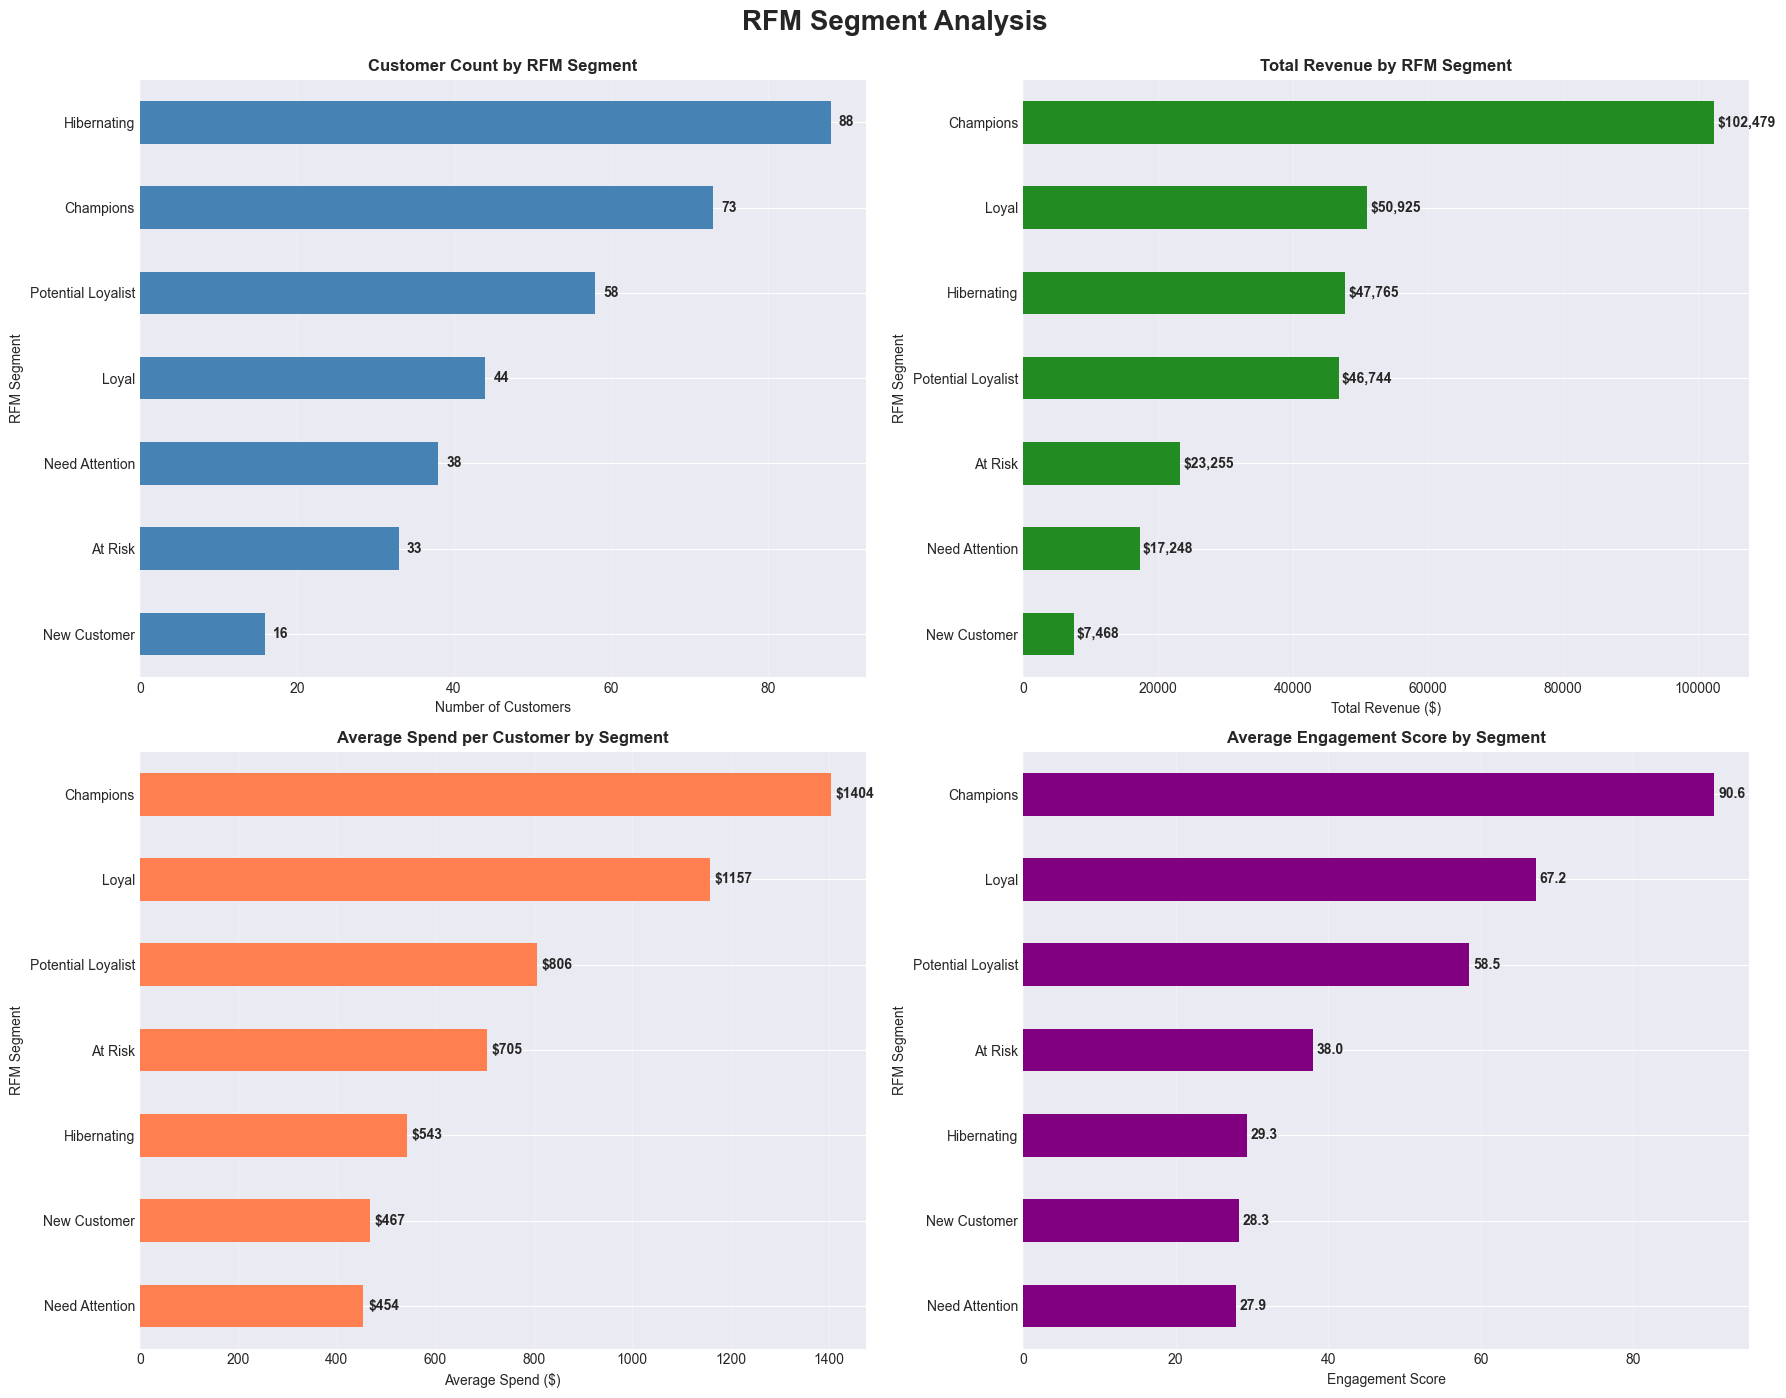

✅ RFM segment analysis saved to visualizations/rfm_segment_analysis.png


In [12]:
# RFM Segment Visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('RFM Segment Analysis', fontsize=20, fontweight='bold', y=0.995)

# 1. Customer count by segment
ax1 = axes[0, 0]
segment_counts = df['rfm_segment'].value_counts().sort_values(ascending=True)
segment_counts.plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_title('Customer Count by RFM Segment', fontsize=12, fontweight='bold')
ax1.set_xlabel('Number of Customers', fontsize=10)
ax1.set_ylabel('RFM Segment', fontsize=10)
for i, v in enumerate(segment_counts.values):
    ax1.text(v + 1, i, str(v), va='center', fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# 2. Revenue by segment
ax2 = axes[0, 1]
revenue_by_segment = df.groupby('rfm_segment')['total_spend'].sum().sort_values(ascending=True)
revenue_by_segment.plot(kind='barh', ax=ax2, color='forestgreen')
ax2.set_title('Total Revenue by RFM Segment', fontsize=12, fontweight='bold')
ax2.set_xlabel('Total Revenue ($)', fontsize=10)
ax2.set_ylabel('RFM Segment', fontsize=10)
for i, v in enumerate(revenue_by_segment.values):
    ax2.text(v + 500, i, f'${v:,.0f}', va='center', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# 3. Average spend by segment
ax3 = axes[1, 0]
avg_spend = df.groupby('rfm_segment')['total_spend'].mean().sort_values(ascending=True)
avg_spend.plot(kind='barh', ax=ax3, color='coral')
ax3.set_title('Average Spend per Customer by Segment', fontsize=12, fontweight='bold')
ax3.set_xlabel('Average Spend ($)', fontsize=10)
ax3.set_ylabel('RFM Segment', fontsize=10)
for i, v in enumerate(avg_spend.values):
    ax3.text(v + 10, i, f'${v:.0f}', va='center', fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# 4. Engagement score by segment
ax4 = axes[1, 1]
avg_engagement = df.groupby('rfm_segment')['engagement_score'].mean().sort_values(ascending=True)
avg_engagement.plot(kind='barh', ax=ax4, color='purple')
ax4.set_title('Average Engagement Score by Segment', fontsize=12, fontweight='bold')
ax4.set_xlabel('Engagement Score', fontsize=10)
ax4.set_ylabel('RFM Segment', fontsize=10)
for i, v in enumerate(avg_engagement.values):
    ax4.text(v + 0.5, i, f'{v:.1f}', va='center', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../visualizations/rfm_segment_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ RFM segment analysis saved to visualizations/rfm_segment_analysis.png")

## 5. Churn Risk Analysis

In [13]:
# Churn risk analysis
churn_analysis = df.groupby('churn_risk').agg({
    'customer_id': 'count',
    'total_spend': ['mean', 'sum'],
    'items_purchased': 'mean',
    'days_since_last_purchase': 'mean',
    'engagement_score': 'mean',
    'average_rating': 'mean'
}).round(2)

churn_analysis.columns = ['Count', 'Avg_Spend', 'Total_Spend', 'Avg_Items', 
                          'Avg_Days_Since', 'Avg_Engagement', 'Avg_Rating']

# Order by risk level
churn_order = ['Low', 'Medium', 'High']
churn_analysis = churn_analysis.reindex(churn_order)

print("⚠️ Churn Risk Analysis:\n")
print(churn_analysis.to_string())

⚠️ Churn Risk Analysis:

            Count  Avg_Spend  Total_Spend  Avg_Items  Avg_Days_Since  Avg_Engagement  Avg_Rating
churn_risk                                                                                      
Low           NaN        NaN          NaN        NaN             NaN             NaN         NaN
Medium        NaN        NaN          NaN        NaN             NaN             NaN         NaN
High          NaN        NaN          NaN        NaN             NaN             NaN         NaN


In [16]:
print(df['churn_risk'].unique())

['Low Risk' 'High Risk' 'Medium Risk']


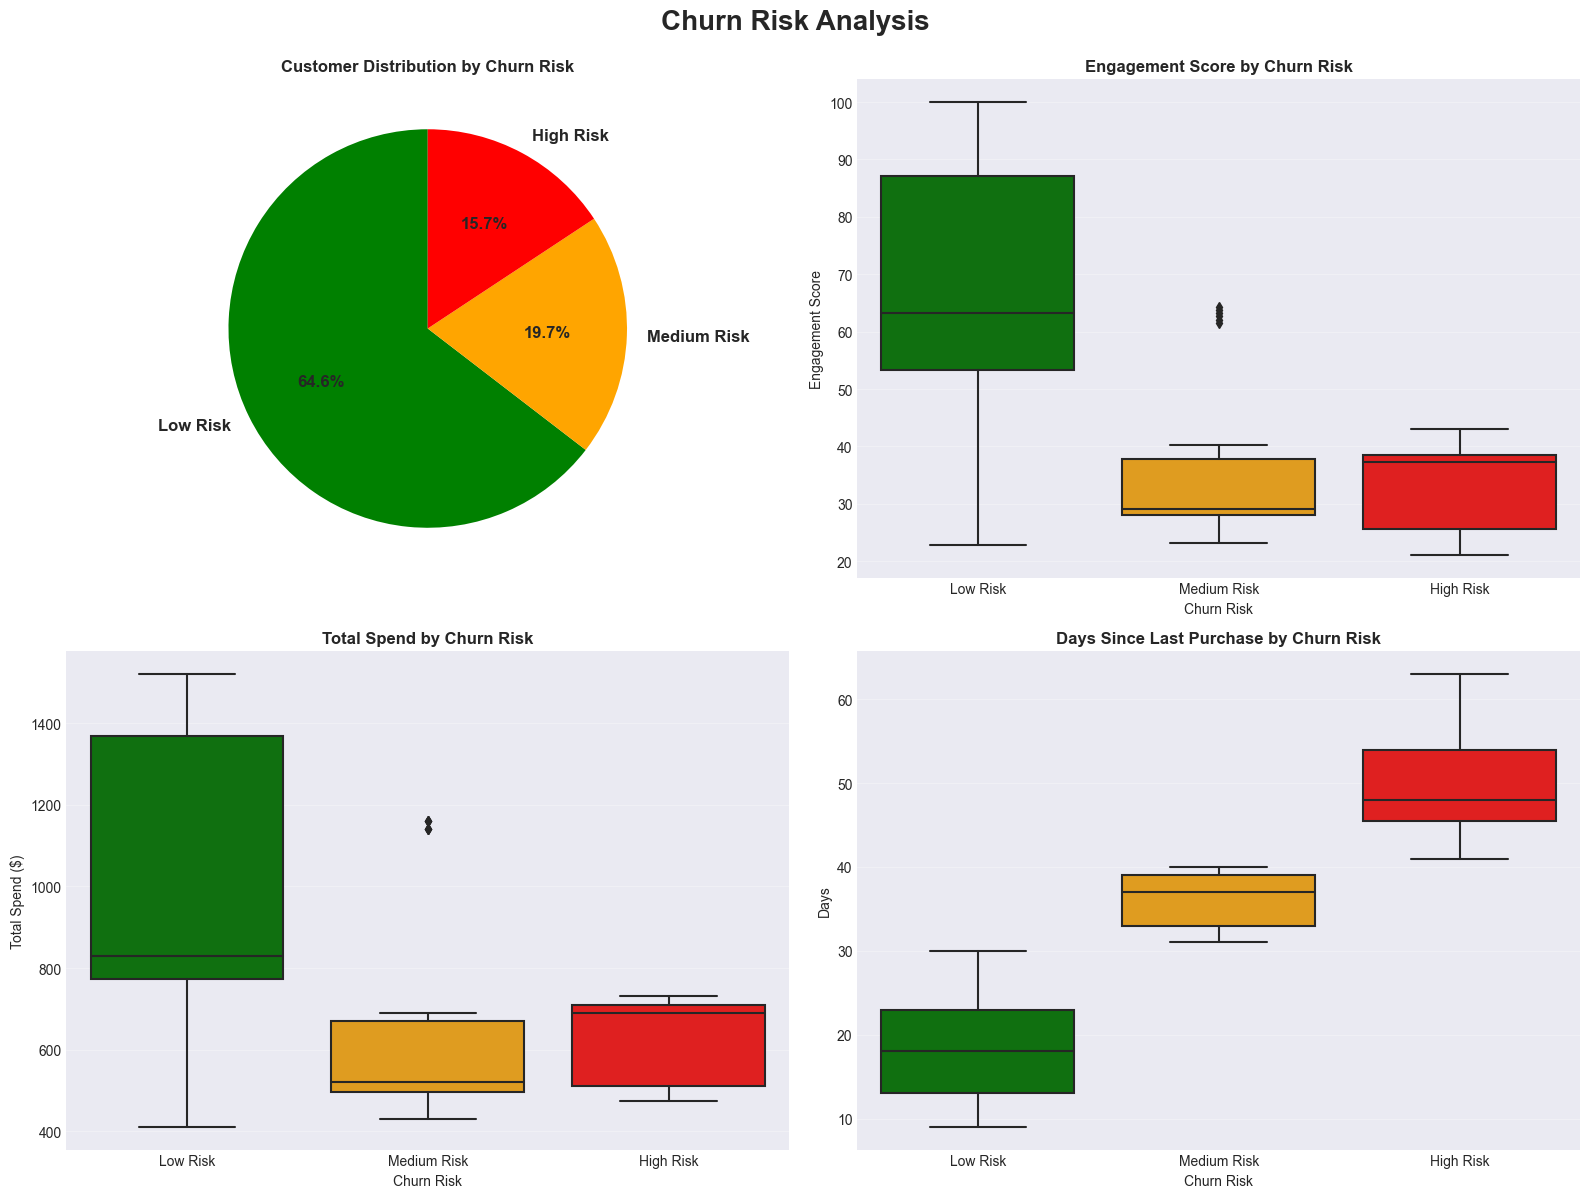

✅ Churn risk analysis saved to visualizations/churn_risk_analysis.png


In [17]:
# Churn risk visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Churn Risk Analysis', fontsize=20, fontweight='bold', y=0.995)

# correct category names
churn_order = ['Low Risk', 'Medium Risk', 'High Risk']
color_map = {'Low Risk': 'green', 'Medium Risk': 'orange', 'High Risk': 'red'}

# Get actual categories in data
actual_churn_order = [level for level in churn_order if level in df['churn_risk'].unique()]
actual_colors = [color_map[level] for level in actual_churn_order]

# 1. Customer distribution
ax1 = axes[0, 0]
churn_counts = df['churn_risk'].value_counts()
churn_counts_sorted = churn_counts.reindex(actual_churn_order)

ax1.pie(churn_counts_sorted.values, labels=churn_counts_sorted.index, autopct='%1.1f%%',
        colors=actual_colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title('Customer Distribution by Churn Risk', fontsize=12, fontweight='bold')

# 2. Engagement by churn risk
ax2 = axes[0, 1]
sns.boxplot(data=df, x='churn_risk', y='engagement_score', ax=ax2,
            order=actual_churn_order, palette=color_map)
ax2.set_title('Engagement Score by Churn Risk', fontsize=12, fontweight='bold')
ax2.set_xlabel('Churn Risk', fontsize=10)
ax2.set_ylabel('Engagement Score', fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# 3. Spending by churn risk
ax3 = axes[1, 0]
sns.boxplot(data=df, x='churn_risk', y='total_spend', ax=ax3,
            order=actual_churn_order, palette=color_map)
ax3.set_title('Total Spend by Churn Risk', fontsize=12, fontweight='bold')
ax3.set_xlabel('Churn Risk', fontsize=10)
ax3.set_ylabel('Total Spend ($)', fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# 4. Days since last purchase
ax4 = axes[1, 1]
sns.boxplot(data=df, x='churn_risk', y='days_since_last_purchase', ax=ax4,
            order=actual_churn_order, palette=color_map)
ax4.set_title('Days Since Last Purchase by Churn Risk', fontsize=12, fontweight='bold')
ax4.set_xlabel('Churn Risk', fontsize=10)
ax4.set_ylabel('Days', fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../visualizations/churn_risk_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Churn risk analysis saved to visualizations/churn_risk_analysis.png")


## 6. Multivariate Analysis
### 6.1 Pair Plot of Key Features

Creating pair plot (this may take a moment)...


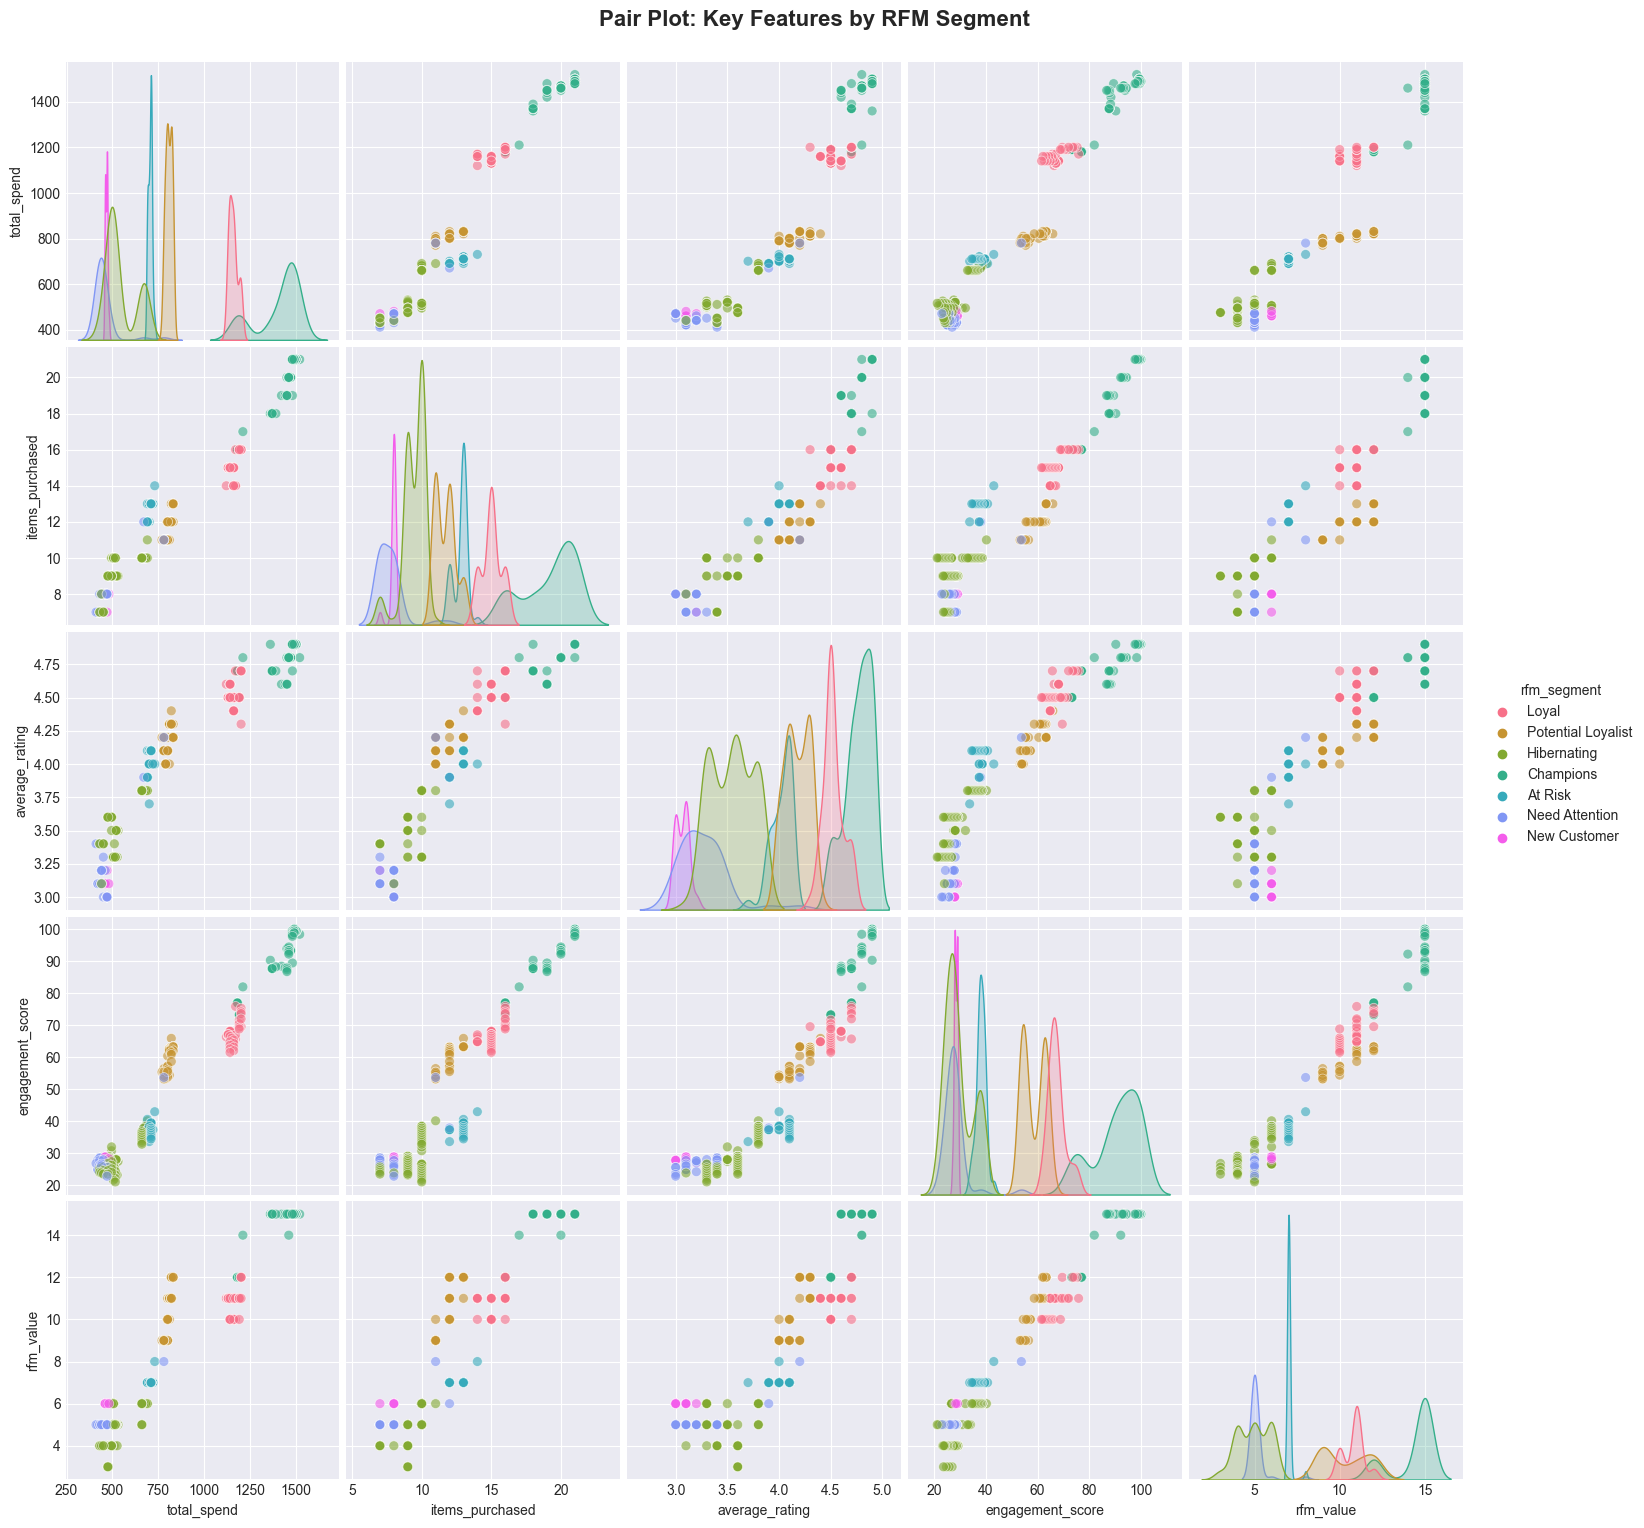

✅ Pair plot saved to visualizations/multivariate_pairplot.png


In [18]:
# Pair plot for key features
key_features_pairplot = ['total_spend', 'items_purchased', 'average_rating', 
                         'engagement_score', 'rfm_value']

print("Creating pair plot (this may take a moment)...")
pairplot = sns.pairplot(df[key_features_pairplot + ['rfm_segment']], 
                        hue='rfm_segment', 
                        palette='husl',
                        diag_kind='kde',
                        plot_kws={'alpha': 0.6, 's': 50},
                        height=3)

pairplot.fig.suptitle('Pair Plot: Key Features by RFM Segment', 
                      fontsize=16, fontweight='bold', y=1.02)
plt.savefig('../visualizations/multivariate_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Pair plot saved to visualizations/multivariate_pairplot.png")

## 7. Statistical Tests
### 7.1 ANOVA Tests for Categorical Features

In [20]:
# ANOVA test: Does spending differ significantly across categories?
from scipy.stats import f_oneway

print("📊 ANOVA Tests: Total Spend vs Categorical Features\n")
print("=" * 70)

categorical_features = ['gender', 'membership_type', 'rfm_segment', 'satisfaction_level']

for cat_feature in categorical_features:
    groups = [group['total_spend'].values for name, group in df.groupby(cat_feature)]
    f_stat, p_value = f_oneway(*groups)
    
    print(f"\n{cat_feature.replace('_', ' ').title()}:")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  P-value: {p_value:.6f}")
    
    if p_value < 0.05:
        print(f"  ✅ Result: Significant difference (p < 0.05)")
    else:
        print(f"  ❌ Result: No significant difference (p >= 0.05)")

print("\n" + "=" * 70)

📊 ANOVA Tests: Total Spend vs Categorical Features


Gender:
  F-statistic: 63.0043
  P-value: 0.000000
  ✅ Result: Significant difference (p < 0.05)

Membership Type:
  F-statistic: 2294.4941
  P-value: 0.000000
  ✅ Result: Significant difference (p < 0.05)

Rfm Segment:
  F-statistic: 1410.5934
  P-value: 0.000000
  ✅ Result: Significant difference (p < 0.05)

Satisfaction Level:
  F-statistic: 596.0596
  P-value: 0.000000
  ✅ Result: Significant difference (p < 0.05)



## 8. Business Insights Summary

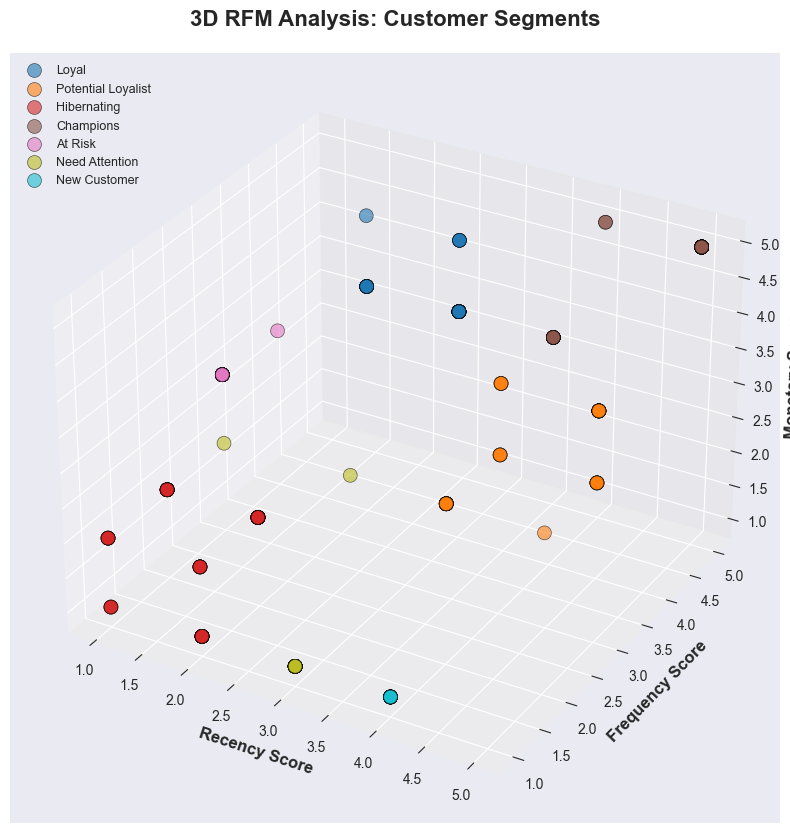

✅ 3D RFM plot saved to visualizations/rfm_3d_analysis.png


In [21]:
# 3D scatter plot for RFM
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Color by segment
segments = df['rfm_segment'].unique()
colors_map = plt.cm.get_cmap('tab10', len(segments))

for idx, segment in enumerate(segments):
    segment_data = df[df['rfm_segment'] == segment]
    ax.scatter(segment_data['recency_score'], 
               segment_data['frequency_score'], 
               segment_data['monetary_score'],
               c=[colors_map(idx)], 
               label=segment, 
               s=100, 
               alpha=0.6,
               edgecolors='black',
               linewidth=0.5)

ax.set_xlabel('Recency Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency Score', fontsize=12, fontweight='bold')
ax.set_zlabel('Monetary Score', fontsize=12, fontweight='bold')
ax.set_title('3D RFM Analysis: Customer Segments', fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=9, framealpha=0.9)
ax.grid(True, alpha=0.3)

plt.savefig('../visualizations/rfm_3d_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ 3D RFM plot saved to visualizations/rfm_3d_analysis.png")

## 9. EDA Summary Statistics

In [22]:
# Create comprehensive EDA summary
print("="*80)
print("PHASE 4: EDA COMPLETION SUMMARY")
print("="*80)
print("\n✅ COMPLETED ANALYSES:")
print("  1. Univariate Analysis - Distribution of all features")
print("  2. Bivariate Analysis - Feature relationships and correlations")
print("  3. Multivariate Analysis - Complex patterns (pair plots, 3D plots)")
print("  4. RFM Segmentation Deep Dive - Customer segment performance")
print("  5. Churn Risk Analysis - At-risk customer identification")
print("  6. Statistical Testing - ANOVA tests for significance")
print("  7. Business Insights Generation - Actionable recommendations")

print("\n📊 VISUALIZATIONS CREATED:")
import os
viz_dir = '../visualizations'
viz_files = [f for f in os.listdir(viz_dir) if f.endswith('.png')]
for idx, viz_file in enumerate(viz_files, 1):
    print(f"  {idx}. {viz_file}")

print("\n📄 REPORTS GENERATED:")
reports_dir = '../reports'
report_files = [f for f in os.listdir(reports_dir) if f.endswith('.txt')]
for idx, report_file in enumerate(report_files, 1):
    print(f"  {idx}. {report_file}")

print("\n🎯 KEY FINDINGS:")
print(f"  • Total Customers Analyzed: {len(df):,}")
print(f"  • Features Examined: {len(df.columns)}")
print(f"  • RFM Segments Identified: {df['rfm_segment'].nunique()}")
print(f"  • High-Risk Churn Customers: {len(df[df['churn_risk']=='High'])} ({len(df[df['churn_risk']=='High'])/len(df)*100:.1f}%)")
print(f"  • Champions (Best Customers): {len(df[df['rfm_segment']=='Champions'])} ({len(df[df['rfm_segment']=='Champions'])/len(df)*100:.1f}%)")

print("\n" + "="*80)
print("✅ PHASE 4 COMPLETE - Ready for Phase 5: Machine Learning Models")
print("="*80)

PHASE 4: EDA COMPLETION SUMMARY

✅ COMPLETED ANALYSES:
  1. Univariate Analysis - Distribution of all features
  2. Bivariate Analysis - Feature relationships and correlations
  3. Multivariate Analysis - Complex patterns (pair plots, 3D plots)
  4. RFM Segmentation Deep Dive - Customer segment performance
  5. Churn Risk Analysis - At-risk customer identification
  6. Statistical Testing - ANOVA tests for significance
  7. Business Insights Generation - Actionable recommendations

📊 VISUALIZATIONS CREATED:
  1. bivariate_relationships.png
  2. categorical_distributions.png
  3. churn_risk_analysis.png
  4. correlation_heatmap_detailed.png
  5. multivariate_pairplot.png
  6. rfm_3d_analysis.png
  7. rfm_segment_analysis.png
  8. spending_by_categories.png
  9. univariate_distributions.png

📄 REPORTS GENERATED:
  1. data_cleaning_summary.txt
  2. data_exploration_summary.txt
  3. eda_business_insights.txt
  4. feature_engineering_report.txt

🎯 KEY FINDINGS:
  • Total Customers Analyzed: